<h1>Purpose of Project
<h2>: Predict suvival on the Titanic

<h1><u>Process</u>
<br>

<h3>0. Import data
<br>
<h3>1. Exploratory data analysis
    * Explore each data file structure
    *  Basic statistics visualization
<br>
<h3>2. Feature Engineering 
    * Data Cleansing
    * Select which feature should be included in model 
<br>
<h3>3. Modeling 
    * Logistic Regression
    * Support Vector Machine(SVM)
    * k-Nearest Neighbor(KNN)
    * Random Forest
    * Naive Bayes
<br>

<h3>4. Testing

<h1><b>0. Import Data</b>

In [1329]:
import pandas as pd
import numpy as np

test = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\test.csv")
train = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\train.csv")

<h1><b>1.Exploratory data analysis</b>
<h3><br>(1) Check Data info 

In [1330]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [1331]:
test.head(80)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S


<h3>(2) Check Missing Data

In [1332]:
train.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1333]:
test.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>(3)Visualization

In [1334]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [1335]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [1336]:
# 파이차트

#def pie_cahrt(feature):
#     feature_ratio = train[feature].value_counts(sort=False)
#     feature_size = featrue_ration.size
#     feature_index = feature_ratio.index
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()

# ​    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
# ​    plt.title(feature + '\'s ratio in total')
# ​    plt.show()

# ​    for i, index in enumerate(feature_index):
# ​        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
# ​        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
# ​        plt.title(str(index) + '\'s ratio')

# ​    plt.show()


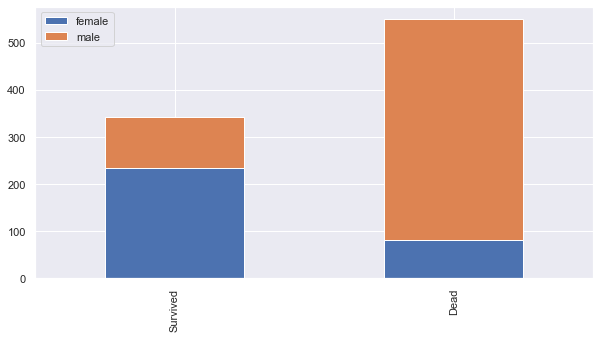

In [1337]:
bar_chart('Sex')
#Chart illustrates that female tent to survived than male

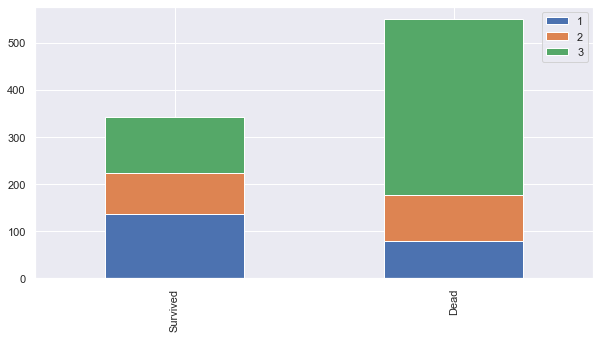

In [1338]:
bar_chart('Pclass')
#Chart shows more 1st class passengers were survived than any other classes passengers
#3rd class passengers took highest proportions from the death toll

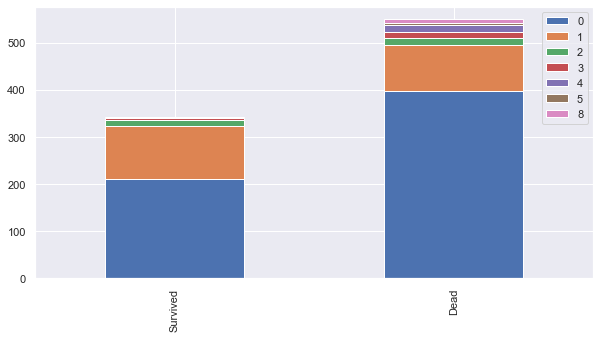

In [1339]:
bar_chart('SibSp') # # of siblings / spouses aboard the Titanic

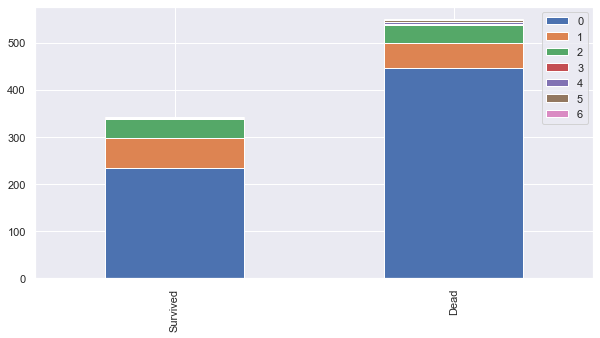

In [1340]:
bar_chart('Parch') # # of parents / children aboard the Titanic

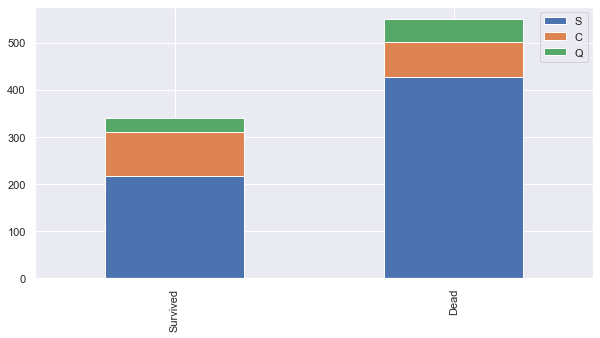

In [1341]:
bar_chart('Embarked')

2. Feature Engineering
<br>To sum up Exploratory Analysis, Female & High class passengers & passengers who were accompanying family
 showed less death toll.

 <br>
 < Data preprocessing ><br>
 - Merge train & test data
 - Data cleansing
     - Name Feature : Extract 'Title' from names - Using regular expression / Unify similar title into 3 catogories -> Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
     - Sex feature: convert to string Data
     - Embaked: Handle missing data - Replace 'NaN'elements<br>
        (*Ref: How to handle missing data: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
     - Age: Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale) / Handle missing data - Replace 'Nan' into 'Mean' value of each age group
     - Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group
     - SibSp & Parch: Merge two feature into new "Family" feature
- Drop non-using features: Name, Ticket, Cabin, SibSp, Parch

(0) Merge Train & Test Data

In [1342]:
train_test_data = [train, test] 
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

(1) Data cleansing - Name

In [1343]:
for dataset in train_test_data:
    #dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.') #정규식: 대문자 A-Z로 시작하고 .로 끝나는 모든 문자열을 추출한다

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1344]:
#Count each each titles frequency
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Ms            1
Sir           1
Don           1
Capt          1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [1345]:
#Reshaping data using cross tabulation: Matching Title and Gender
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1346]:
#Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Capt': 0, 'Col': 0, 'Countess': 3, 'Don': 0, 'Dr': 3, 'Jonkheer': 0, 'Lady': 3, 'Major': 0, 'Master': 0, 'Mlle': 3, 'Mme': 3, 'Ms': 2, 'Rev': 0, 'Sir': 0}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [1347]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [1348]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


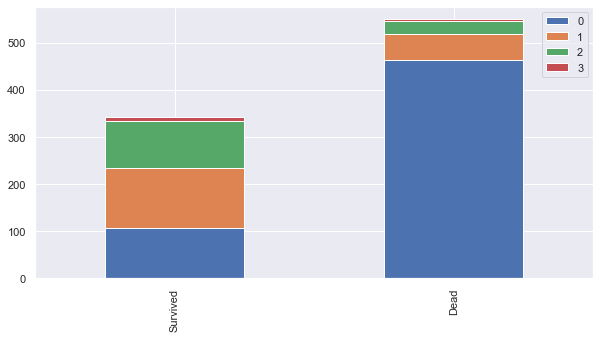

In [1349]:
bar_chart('Title')

(2) Sex - Data Mapping

In [1350]:
# sex_mapping = {'male': 0, 'female': 1}
# for dataset in train_test_data:
#     dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.loc[train['Sex'] == 'female', 'Sex'] = 1
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train['Sex'] = train['Sex'].astype(int)   

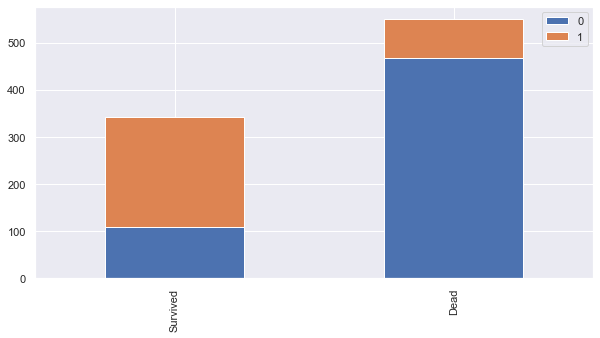

In [1351]:
bar_chart('Sex')

In [1352]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [1353]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


(3) Embaked: Handle missing data - Replace 'NaN'elements

In [1354]:
#check 'Nan Value
train.isnull().sum()
#There are 2 missing Embarked value in train data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [1355]:
test.isnull().sum()
#There is no missing data in test data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [1356]:
#Fill Nan value in testset with 'S'

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)    

In [1357]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


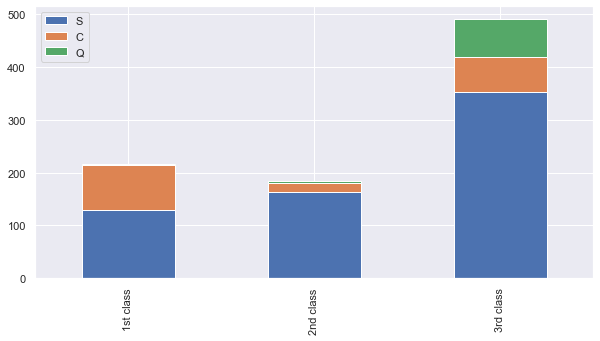

In [1358]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Most of the 3rd class passengers were on board from 'Q'
<br>It can be assumed that passengers aboard from 'Q' are more likely to die

In [1359]:
#Mapping "Class" into categorical value
embarked_mapping = {'S' : 0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

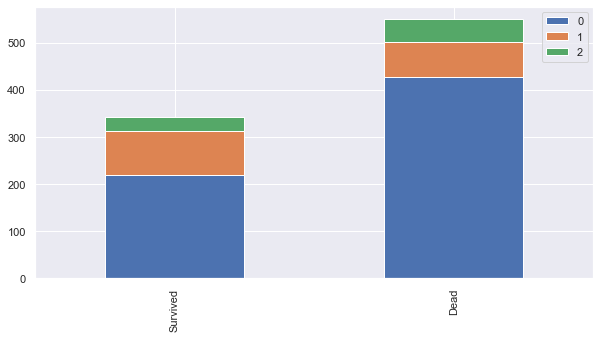

In [1360]:
bar_chart('Embarked')

(3) Age<br>
 - Check missing data <br>
 - Handle missing data - Replace 'Nan' into 'Mean' value of each age group <br>
 - Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale)

In [1361]:
#Chech the common characteristics of Nan data
age_nan_train = train[train['Age'].isnull()]
age_nan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2,0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1,2
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2,1


In [1362]:
age_nan_test = test[test['Age'].isnull()]
age_nan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,0,0.0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,0,2.0
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,1,0.0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,2.0
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,0,1.0


In [1363]:
#Replace missing 'Age' data into each Title group's age median value
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [1364]:
#Check if 'Nan' values have been replaced properly
print(train[train['Age'].isnull()])
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []


In [1365]:
#Median Age of Each Title
#0-Mr / 1-Miss / 2-Mrs / 3-others
Median_age = train['Age'].groupby(train['Title'])
Median_age
Median_age.median()

Title
0    29.0
1    21.0
2    35.0
3    33.0
Name: Age, dtype: float64

In [1366]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

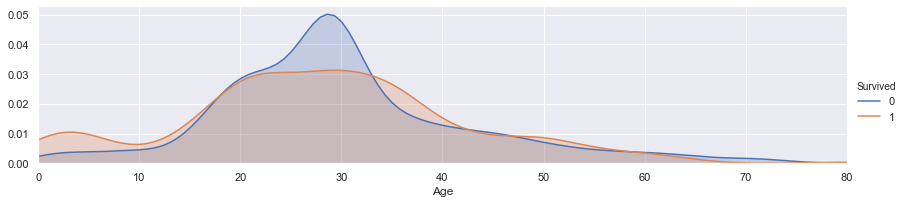

In [1367]:
#Visualize Age distribution
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [1368]:
def binning(ttd, feature, bins):
    feature_category = feature + '_category'
    for dataset in ttd:
        for i in range(len(bins)-1):
            dataset.loc[(dataset[feature] >= bins[i]) & (dataset[feature] <= bins[i+1]), feature_category] = i
        dataset.loc[(dataset[feature] > bins[len(bins)-1]), feature_category] = len(bins)


binning(train_test_data, 'Age', [0, 16, 32, 48, 64])


# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
#     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


In [1369]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,29.0,0,0,374910,8.0500,NaN,0,0,1.0
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,1,0,5.0
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,1,0,1.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,0,1,231919,23.0000,NaN,0,2,2.0


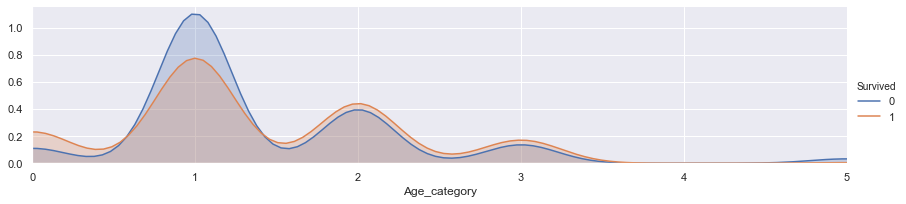

In [1370]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age_category',shade= True)
facet.set(xlim=(0, train['Age_category'].max()))
facet.add_legend()
 
plt.show()

In [1371]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2.0


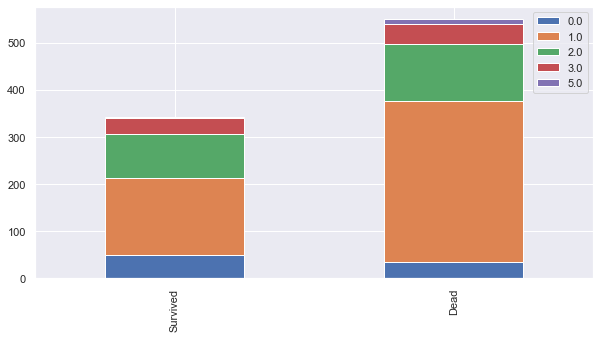

In [1372]:
bar_chart('Age_category')

(4) Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group

In [1373]:
#Replace missing 'Fare' data into each Class group's Fare median value
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [1374]:
#Check if 'Nan' values have been replaced properly
print(test[test['Fare'].isnull()])
print(train[train['Fare'].isnull()])


Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Age_category]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Age_category]
Index: []


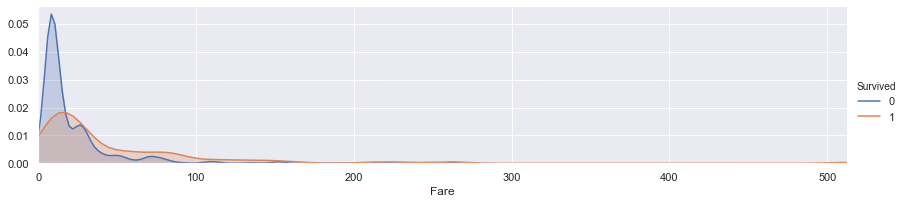

In [1375]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

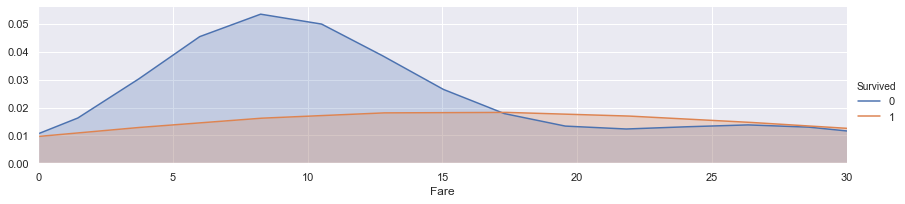

In [1376]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
 
plt.show()

In [1377]:
#Binning Numerical Age to Categorical Variable
print(np.isnan(train_test_data[0]['Fare']).any())
print(train.loc[train['Fare'] == 0])
binning(train_test_data, 'Fare', [0, 17, 30, 100])
print(np.isnan(train_test_data[0]['Fare_category']).any())

train_test_data

False
     PassengerId  Survived  Pclass                              Name  Sex  \
179          180         0       3               Leonard, Mr. Lionel    0   
263          264         0       1             Harrison, Mr. William    0   
271          272         1       3      Tornquist, Mr. William Henry    0   
277          278         0       2       Parkes, Mr. Francis "Frank"    0   
302          303         0       3   Johnson, Mr. William Cahoone Jr    0   
413          414         0       2    Cunningham, Mr. Alfred Fleming    0   
466          467         0       2             Campbell, Mr. William    0   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"    0   
597          598         0       3               Johnson, Mr. Alfred    0   
633          634         0       1     Parr, Mr. William Henry Marsh    0   
674          675         0       2        Watson, Mr. Ennis Hastings    0   
732          733         0       2              Knight, Mr. Robert J  

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

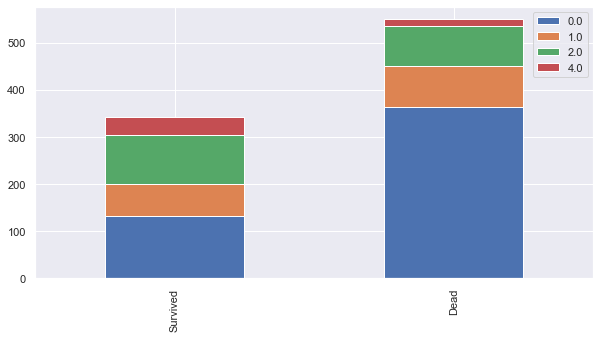

In [1378]:
bar_chart('Fare_category')

In [1379]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2.0,0.0


In [1380]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category,Fare_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0.0,2.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,2.0,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0.0,3.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2.0,1.0,0.0


(5) SibSp & Parch: Merge two feature into new "Family" feature

In [1381]:
for dataset in train_test_data:
    dataset['Family'] = dataset['Parch'] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

(6) Feature Drop

In [1382]:
features_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare', 'Age']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

print(train.head())
print(test.head())

Survived  Pclass  Sex  Embarked  Title  Age_category  Fare_category  Family
0         0       3    0         0      0           1.0            0.0       1
1         1       1    1         1      2           2.0            2.0       1
2         1       3    1         0      1           1.0            0.0       0
3         1       1    1         0      2           2.0            2.0       1
4         0       3    0         0      0           2.0            0.0       0
   Pclass     Sex  Embarked  Title  Age_category  Fare_category  Family
0       3    male         2    0.0           2.0            0.0       0
1       3  female         0    2.0           2.0            0.0       1
2       2    male         2    0.0           3.0            0.0       0
3       3    male         0    0.0           1.0            0.0       0
4       3  female         0    2.0           1.0            0.0       2


In [1399]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [1400]:
train_data.shape

(891, 7)

In [1401]:
test_data = test

In [1402]:
train_data.head()

,Pclass,Sex,Embarked,Title,Age_category,Fare_category,Family
0,3,0,0,0,1.0,0.0,1
1,1,1,1,2,2.0,2.0,1
2,3,1,0,1,1.0,0.0,0
3,1,1,0,2,2.0,2.0,1
4,3,0,0,0,2.0,0.0,0


In [1403]:
test_data.head()

,Pclass,Sex,Embarked,Title,Age_category,Fare_category,Family
0,3,male,2,0.0,2.0,0.0,0
1,3,female,0,2.0,2.0,0.0,1
2,2,male,2,0.0,3.0,0.0,0
3,3,male,0,0.0,1.0,0.0,0
4,3,female,0,2.0,1.0,0.0,2


3. Modeling<br> 
    * k-Nearest Neighbor(KNN)<br>
    * DecisionTree<br>
    * Random Forest<br>
    * Naive Bayes<br>
    * Support Vector Machine(SVM)<br>

In [1404]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

(0) Cross Validation (K-Fold)<br>
Bias를 최소화 하도록 Data set을 Train/validation set을 여러번 쪼개서 Accuracy를 측정 후 Final Accuracy가 가장 높은것을 test data set으로 쓴다?


In [1405]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #10개의 split을 사용하여 Validation 과정을 수행

(1)kNN

In [1406]:
clf = KNeighborsClassifier(n_neighbors = 13) #13개의 이웃을 기준으로 측정 
clf.fit(train_data, target)


#scoring = 'accuracy'
#score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score) #교차 검증 스코어 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [1407]:
clf = DecisionTreeClassifier()

In [1408]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1409]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score) #아까와 동일 

[0.81111111 0.84269663 0.79775281 0.79775281 0.87640449 0.78651685
 0.78651685 0.80898876 0.75280899 0.80898876]


In [1410]:
clf = RandomForestClassifier(n_estimators=13) #13개의 decision tree사용
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1411]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.83146067 0.79775281 0.86516854 0.78651685
 0.79775281 0.83146067 0.75280899 0.80898876]


In [1412]:
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

In [1413]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.76404494 0.75280899 0.74157303 0.78651685
 0.78651685 0.84269663 0.80898876 0.79775281]
